In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Read dataset

In [159]:
df = pd.read_csv('./songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


# Use one-hot encoding to create new columns for each genre

In [160]:
unique_features = []
genres = df["genre"].str.strip()
for genre in genres:
    for g in genre.split(','):
        unique_features.append(g.strip())
unique_features = set(unique_features)
unique_features

{'Dance/Electronic',
 'Folk/Acoustic',
 'R&B',
 'World/Traditional',
 'blues',
 'classical',
 'country',
 'easy listening',
 'hip hop',
 'jazz',
 'latin',
 'metal',
 'pop',
 'rock',
 'set()'}

## Remove "set()" from genre

In [161]:
mask = df["genre"].str.contains("set")
df = df[~mask]
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Assign genres to dataframe

In [162]:
genre_feature = []
genres = df["genre"].str.strip()
for genre in genres:
    genre_feature.append(",".join([g.strip() for g in genre.split(',')]))
    
df['genre'] = genre_feature

genres = df['genre'].str.get_dummies(sep=",")
df = pd.concat([df, genres], axis=1)

/tmp/ipykernel_28497/1376640577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = genre_feature


In [163]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,1,0
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0,0,0,0,0,0,0,0,1,1
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0,0,1,0,0,0,0,0,1,0
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0,0,0,0,0,0,0,1,0,1
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0,0,0,0,0,0,0,0,1,0
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0,0,0,0,0,0,0,0,1,0
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0,0,1,0,1,0,0,0,0,0
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0,0,0,0,0,0,0,0,1,0


In [164]:
df.shape

(1978, 32)

# Preprocessing

## Check missing values

In [165]:
df.isnull().sum()

artist               0
song                 0
duration_ms          0
explicit             0
year                 0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
genre                0
Dance/Electronic     0
Folk/Acoustic        0
R&B                  0
World/Traditional    0
blues                0
classical            0
country              0
easy listening       0
hip hop              0
jazz                 0
latin                0
metal                0
pop                  0
rock                 0
dtype: int64

## Check datatypes

In [166]:
df.dtypes

artist                object
song                  object
duration_ms            int64
explicit                bool
year                   int64
popularity             int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
genre                 object
Dance/Electronic       int64
Folk/Acoustic          int64
R&B                    int64
World/Traditional      int64
blues                  int64
classical              int64
country                int64
easy listening         int64
hip hop                int64
jazz                   int64
latin                  int64
metal                  int64
pop                    int64
rock                   int64
dtype: object

In [167]:
df = df.astype({"explicit": int})

## Dataset describe

In [168]:
df.describe()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,...,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,228911.430738,0.277553,2009.496967,59.899393,0.666642,0.720159,5.395349,-5.508532,0.553084,0.103998,...,0.002022,0.000506,0.010617,0.003539,0.393327,0.001011,0.032356,0.033367,0.825581,0.118301
std,39075.190062,0.447905,5.865569,21.403924,0.140533,0.152732,3.607924,1.937142,0.497300,0.096452,...,0.044935,0.022485,0.102515,0.059399,0.488612,0.031790,0.176988,0.179639,0.379565,0.323046
min,113000.000000,0.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,203754.500000,0.000000,2004.000000,56.000000,0.581000,0.622250,2.000000,-6.481000,0.000000,0.039600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,223339.500000,0.000000,2010.000000,66.000000,0.676000,0.736000,6.000000,-5.283500,1.000000,0.060150,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,248359.750000,1.000000,2015.000000,73.000000,0.762000,0.838000,8.000000,-4.167250,1.000000,0.130750,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,484146.000000,1.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Histogram of features before normalization

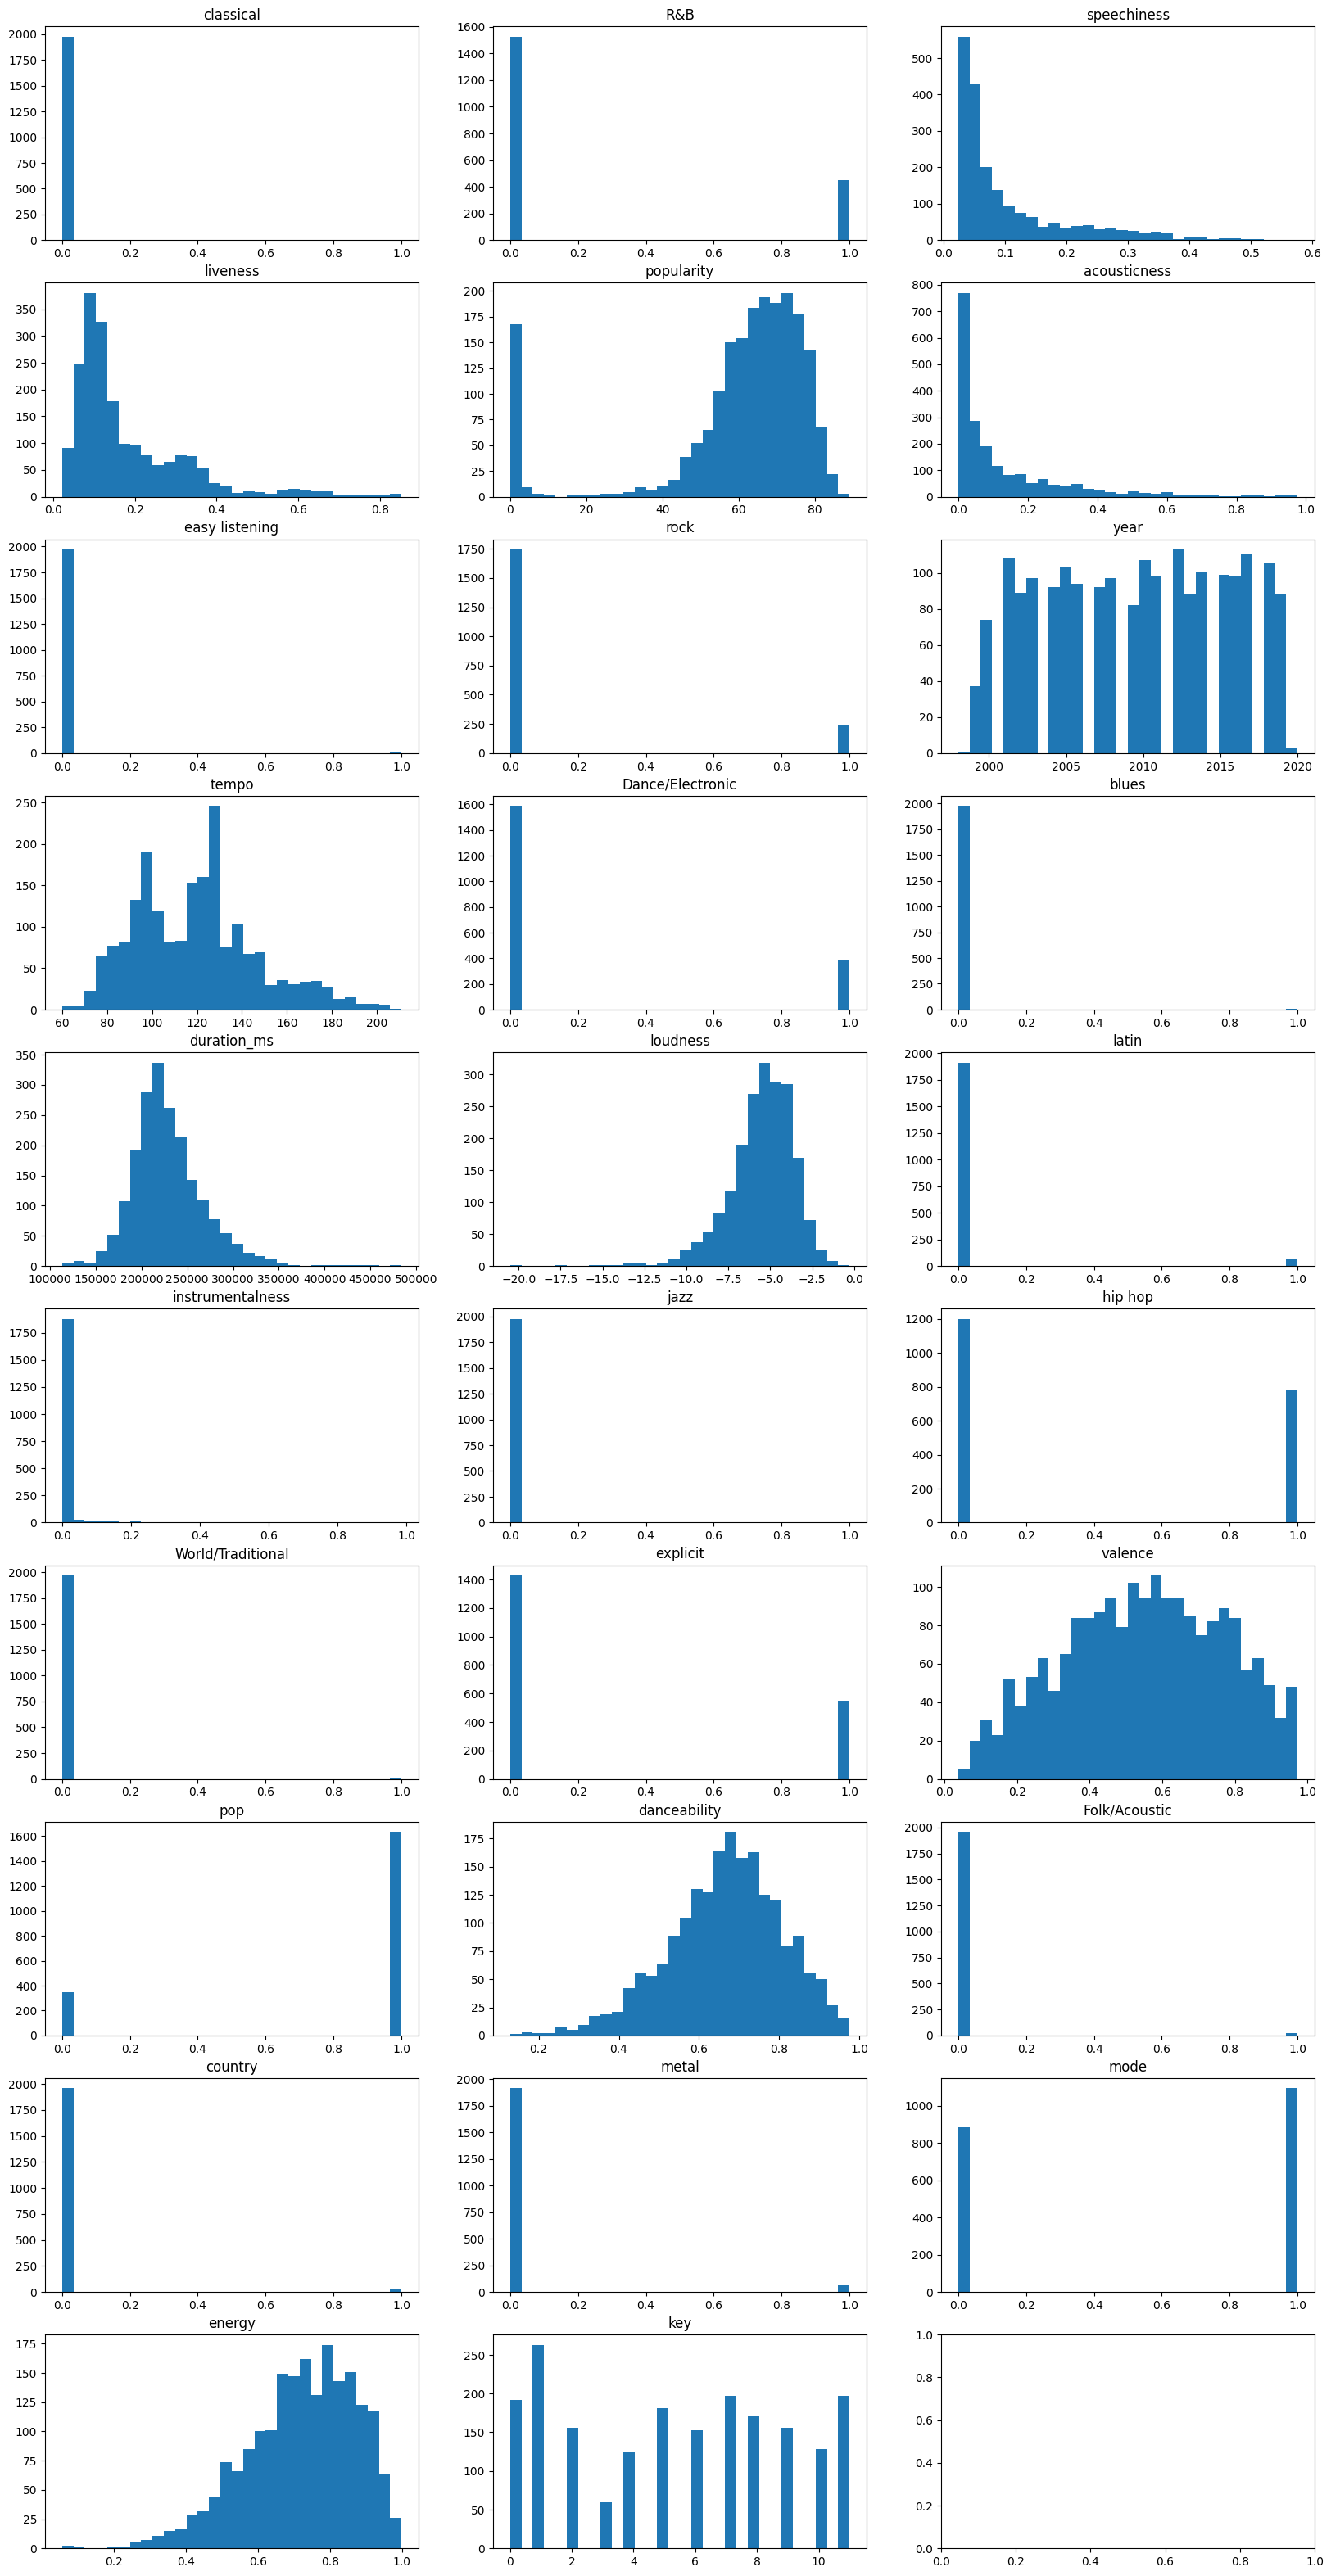

In [155]:
nominal_features = ['artist', 'song', 'genre']
cols = list(set(df.columns) - set(nominal_features))

fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

## Normalizing dataset

In [169]:
main_df = df

In [170]:
numeric_features_df = df.drop(nominal_features, axis=1)
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(numeric_features_df)

In [171]:
scaler = preprocessing.MinMaxScaler()
normalized = scaler.fit_transform(scaled)
df = pd.DataFrame(normalized, columns=[cols])
df

,classical,R&B,speechiness,liveness,popularity,acousticness,easy listening,rock,year,tempo,...,explicit,valence,pop,danceability,Folk/Acoustic,country,metal,mode,energy,key
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1974,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1975,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1976,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Histogram after normalization

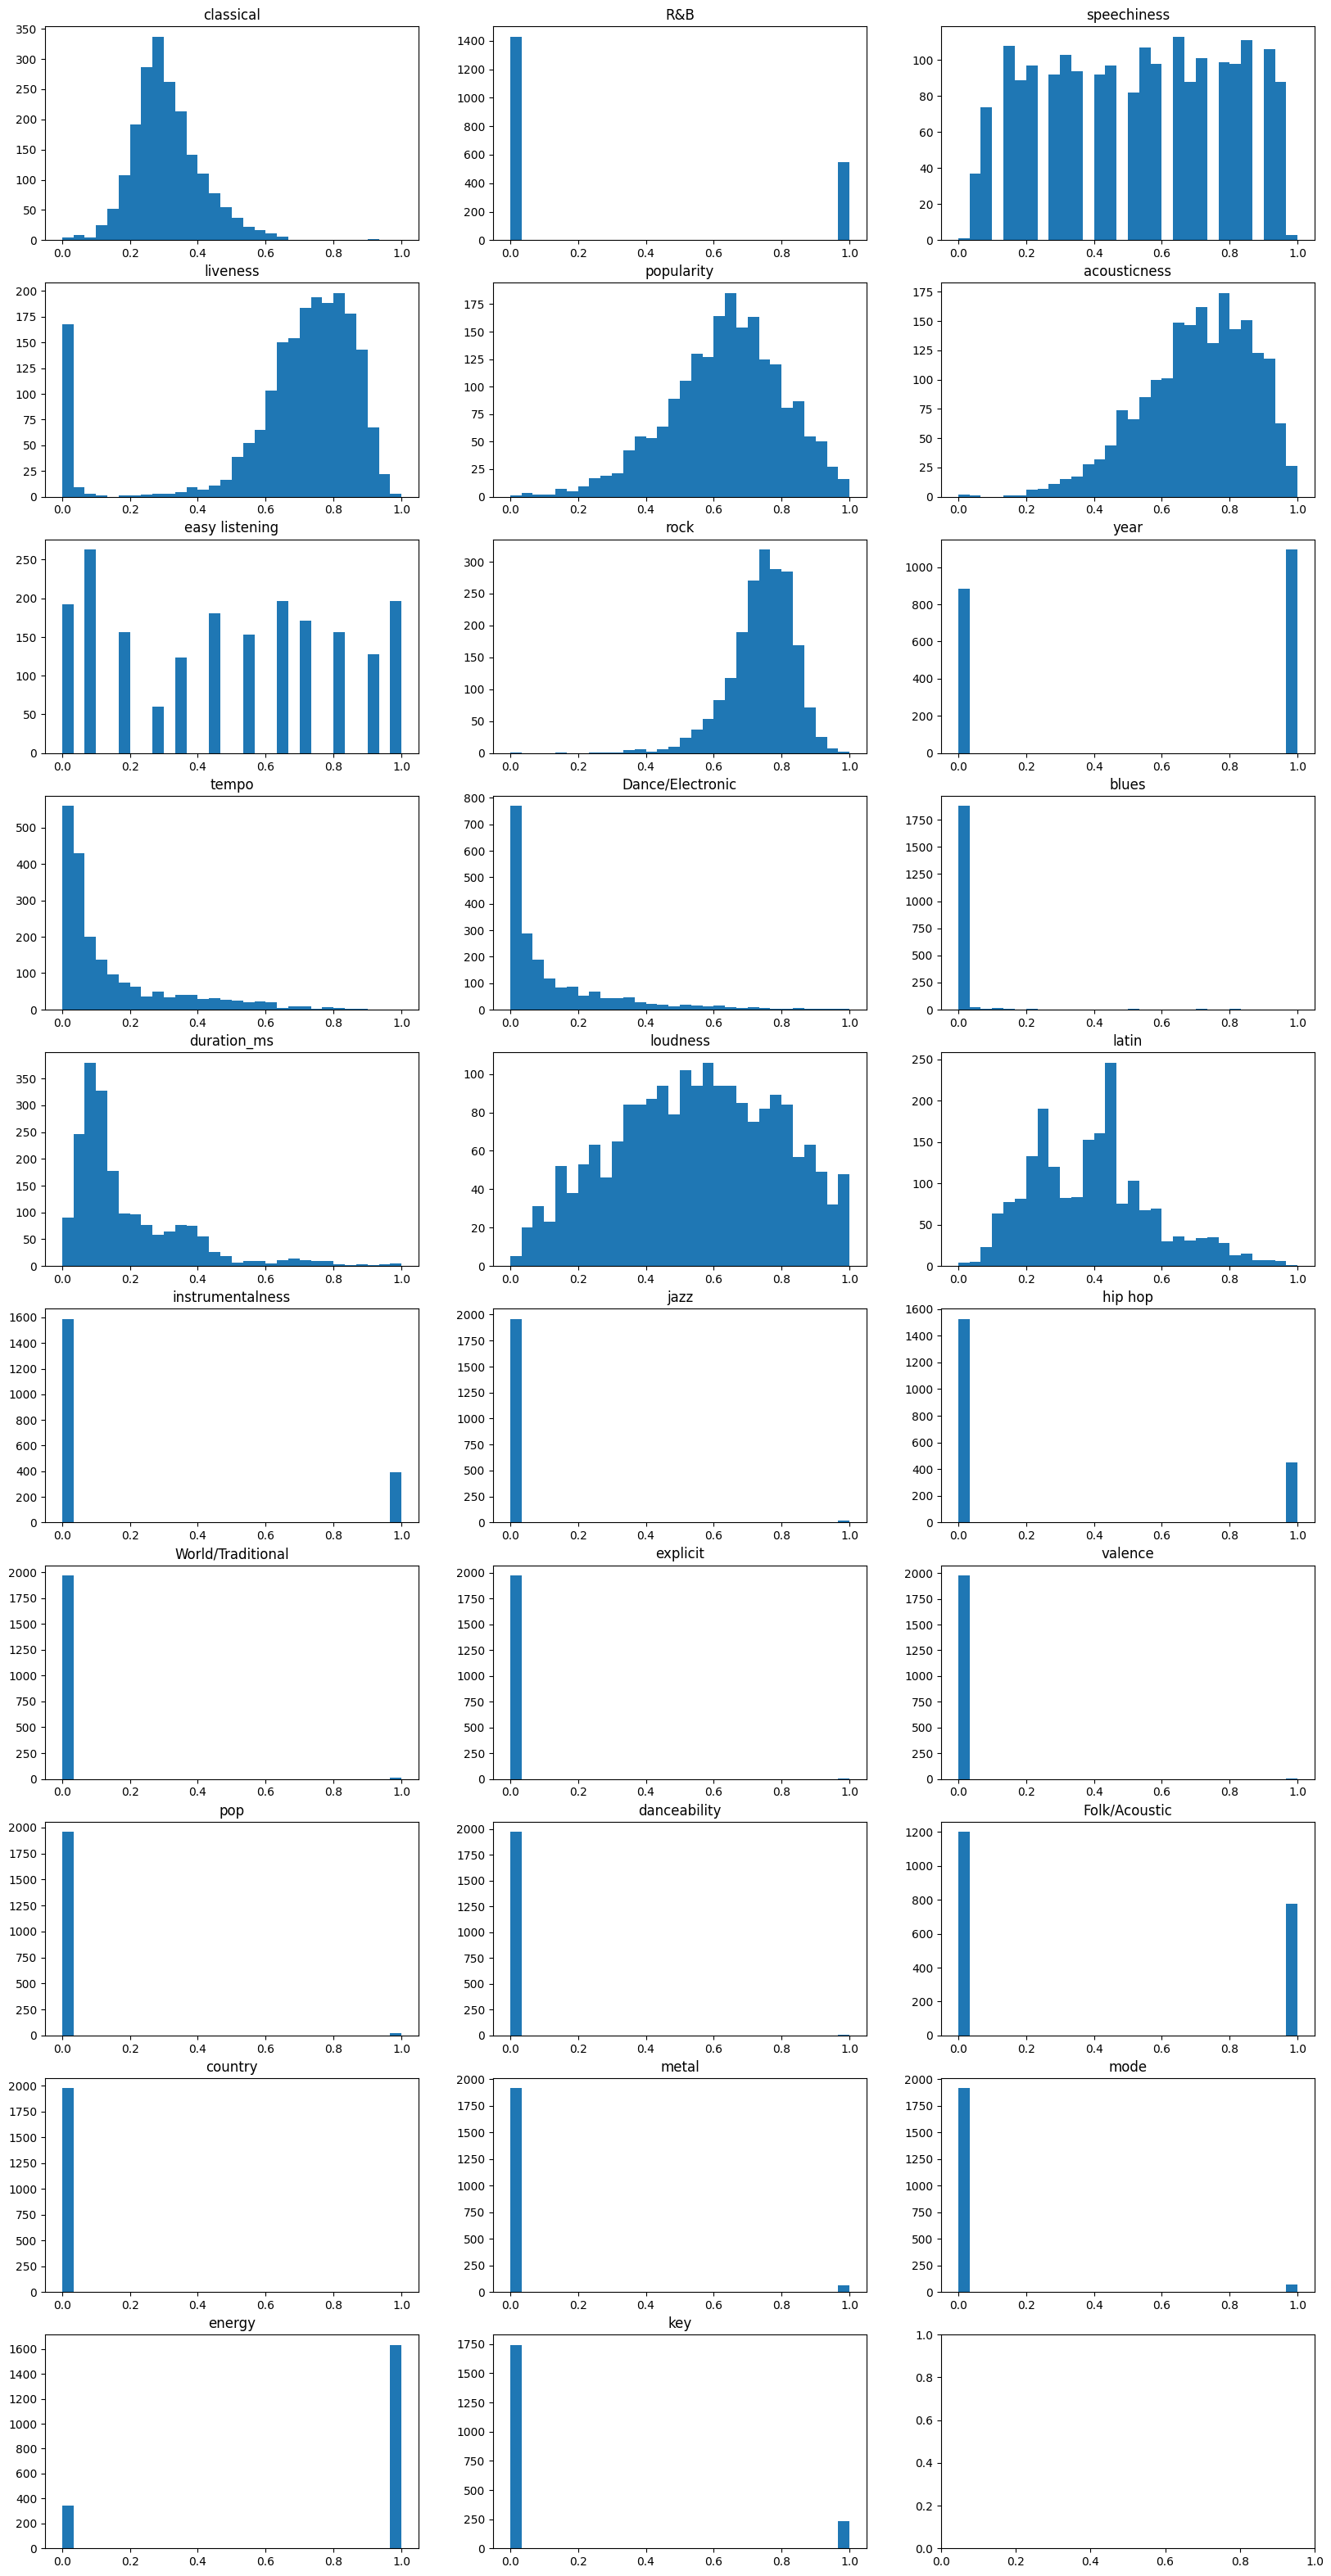

In [158]:
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

In [ ]:
# Data mining...